<a href="https://colab.research.google.com/github/venishree10/Prodigy_Task2/blob/main/Task_2_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploded['Mall_Customers.csv']))


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df["A"]=df[["Annual Income (k$)"]]
df["B"]=df[["Spending Score (1-100)"]]

In [ ]:
X=df[["A","B"]]
X.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


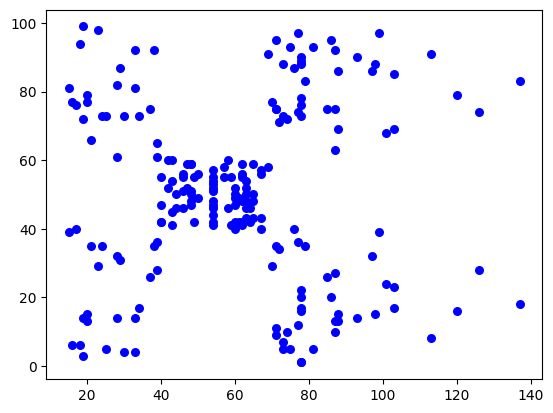

In [ ]:
plt.scatter(X["A"],X["B"],s=30,c='b')
plt.show()

In [ ]:
Kmean=KMeans(n_clusters=5)
Kmean.fit(X)

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters=Kmean.fit_predict(X)
df["label"]=clusters
df.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,0
1,2,Male,21,15,81,15,81,2
2,3,Female,20,16,6,16,6,0
3,4,Female,23,16,77,16,77,2
4,5,Female,31,17,40,17,40,0
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,1
96,97,Female,47,60,47,60,47,1
97,98,Female,27,60,50,60,50,1
98,99,Male,48,61,42,61,42,1


In [ ]:
col=['green','blue','black','yellow','orange',]

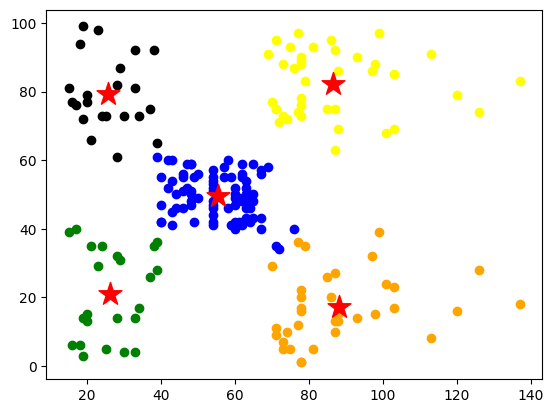

In [ ]:
for i in range(5):
      a=col[i]
      plt.scatter(df.A[df.label==i],df.B[df.label==i],c=a,label='cluster 1')
plt.scatter(centers[:,0],centers[:,1],marker='*',s=300,c='r',label='centroid')

In [ ]:
X1=X.loc[:,["A","B"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

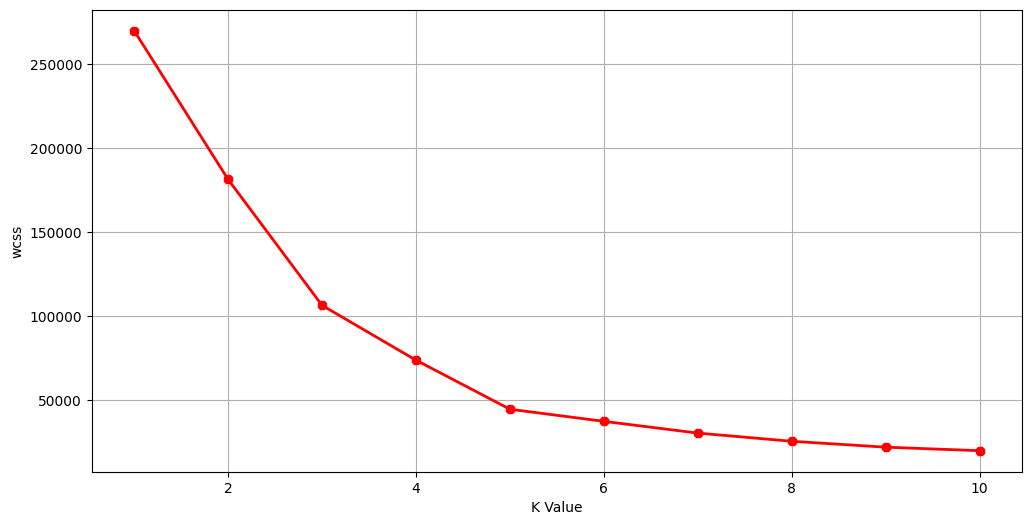

In [ ]:
wcss=[]
for k in range(1,11):
      kmeans=KMeans(n_clusters = k, init = "k-means++")
      kmeans.fit(X1)
      wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()